In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0 

In [5]:
# x_train shape -> (60000, 28, 28) 
# 우리는 실험에 사용할 첫번째 train image 를 가져와서, shape조절해줘야함.
image = x_train[922]
image = image[tf.newaxis, ..., tf.newaxis] # 네트워크에 흘려보내기 위해 모양을 맞추는 과정. ...은 나머지 다

In [6]:
image.shape # 위의 모양 맞추는결과, 

(1, 28, 28, 1)

In [7]:
conv_layer1 = tf.keras.layers.Conv2D(6, (5,5), activation='sigmoid', input_shape=(28,28,1)) # param : 필터갯수, 필터크기, 활성화 함수, 레이어지정(첫번째 레이어 경우 지정해준다.)

In [8]:
image = tf.cast(image, dtype=tf.float32) # 이미지를 텐서플로우 이미지로 변환해줌.

In [9]:
out1 = conv_layer1(image) 

In [10]:
conv_layer1.get_weights()[0].shape, conv_layer1.get_weights()[1].shape # 5x5 필터 인풋노드 1채널,아웃풋노드6으로 .,, 편향이 6

((5, 5, 1, 6), (6,))

In [11]:
weights1 = conv_layer1.get_weights()[0]

In [12]:
weights1.shape

(5, 5, 1, 6)

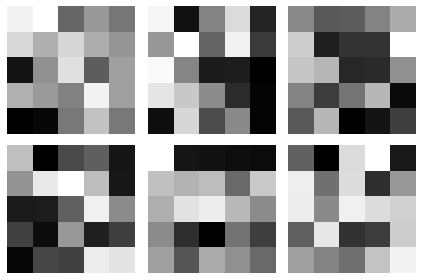

In [13]:
# subplot
fig, axs = plt.subplots(2,3)

for i in range(2):
  for j in range(3):
    axs[i][j].imshow(weights1[:,:,0,(i*3) + j], cmap='gray')
    axs[i][j].axis('off')
plt.tight_layout()

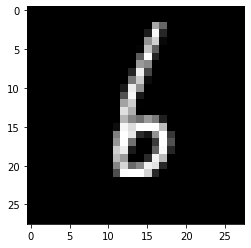

In [14]:
plt.imshow(x_train[922], cmap='gray')

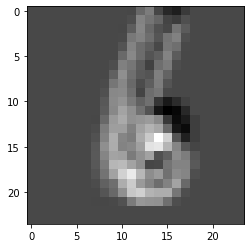

In [15]:
plt.imshow(out1[0,:,:,0], cmap='gray')

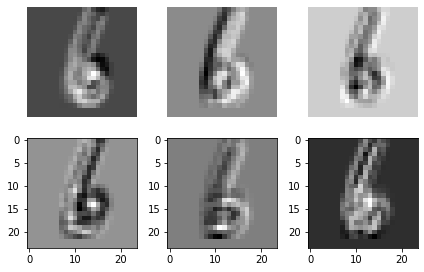

In [16]:
# subplot
fig, axs = plt.subplots(2,3)

for i in range(2):
  for j in range(3):
    axs[i][j].imshow(out1[0,:,:,(i*3) + j], cmap='gray')
    if i==0:
      axs[i][j].axis('off')
plt.tight_layout() 

In [18]:
out1.shape

TensorShape([1, 24, 24, 6])

In [19]:
pool1 = tf.keras.layers.AveragePooling2D((2,2)) # pooling 은 가중치가 따로 없다.

In [20]:
out2 = pool1(out1)

In [21]:
out2.shape

TensorShape([1, 12, 12, 6])

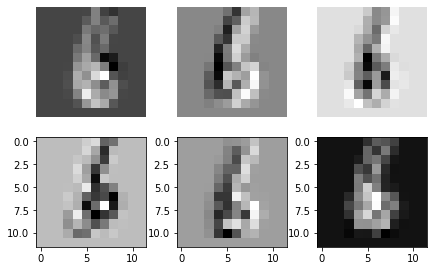

In [22]:
# polling layer 통과한 이미지 확인.
# subplot
fig, axs = plt.subplots(2,3)

for i in range(2):
  for j in range(3):
    axs[i][j].imshow(out2[0,:,:,(i*3) + j], cmap='gray')
    if i==0:
      axs[i][j].axis('off')
plt.tight_layout() 

In [23]:
# 4. convolutions
conv_layer2 = tf.keras.layers.Conv2D(16,(5,5), activation='sigmoid')

In [24]:
out3 = conv_layer2(out2)

In [25]:
out3.shape

TensorShape([1, 8, 8, 16])

In [26]:
conv_layer2.get_weights()[0].shape, conv_layer2.get_weights()[1].shape

((5, 5, 6, 16), (16,))

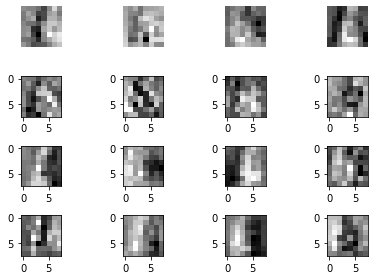

In [28]:
fig, axs = plt.subplots(4,4)

for i in range(4):
  for j in range(4):
    axs[i][j].imshow(out3[0,:,:,(i*4) + j], cmap='gray')
    if i==0:
      axs[i][j].axis('off')
plt.tight_layout() 

In [29]:
#5. Subsampling(Pooling)
pool2 = tf.keras.layers.AveragePooling2D((2,2))

In [30]:
out4 = pool2(out3)

In [31]:
out4.shape

TensorShape([1, 4, 4, 16])

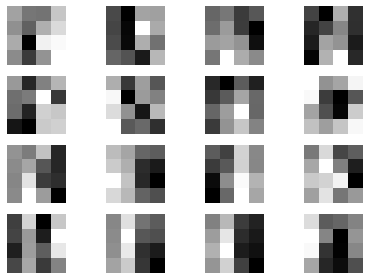

In [32]:
fig, axs = plt.subplots(4,4)

for i in range(4):
  for j in range(4):
    axs[i][j].imshow(out4[0,:,:,(i*4) + j], cmap='gray')
    axs[i][j].axis('off')
plt.tight_layout() 

In [33]:
#6. FullyConnection (Dense)
flatten_layer = tf.keras.layers.Flatten()
out5 = flatten_layer(out4)

In [34]:
out5.shape

TensorShape([1, 256])

In [37]:
fc1 = tf.keras.layers.Dense(120,activation='sigmoid')
fc2 = tf.keras.layers.Dense(84,activation='sigmoid')
fc3 = tf.keras.layers.Dense(10,activation='softmax')

In [38]:
out6 = fc1(out5)

In [39]:
out7 = fc2(out6)

In [44]:
result = fc3(out7)

In [45]:
print(out6.shape)
print(out7.shape)
print(result.shape)

(1, 120)
(1, 84)
(1, 10)


In [46]:
result

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.07050249, 0.07282875, 0.10635263, 0.02405035, 0.14451791,
        0.05008935, 0.0930237 , 0.3129524 , 0.06207836, 0.0636041 ]],
      dtype=float32)>

(0.0, 1.0)

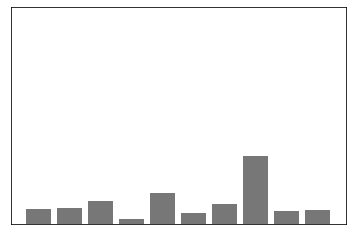

In [51]:
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), result.numpy().ravel(),color="#777777")
plt.ylim([0,1])

처음부터 다시 총 리뷰

In [62]:
# 1)Training

model = tf.keras.models.Sequential(
    [
     #1. input
     #2. convolutions
     tf.keras.layers.Conv2D(6,(5,5), activation="sigmoid",input_shape=(28,28,1)),
     #3. Subsampling(Pooling)
     tf.keras.layers.AveragePooling2D((2,2)),
     #4. Convolutions
     tf.keras.layers.Conv2D(16,(5,5), activation='sigmoid'),
     #5. Subsampling(Pooling)
     tf.keras.layers.AveragePooling2D((2,2)),
     tf.keras.layers.Flatten(),
     #6 fully connection(dense)
     #7. Fully connection(dense)
     #8. Fully connection(output)
     tf.keras.layers.Dense(120,activation='sigmoid'),
     tf.keras.layers.Dense(84,activation='sigmoid'),
     tf.keras.layers.Dense(10,activation='softmax')
    ]
)

In [63]:
model.build()

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [65]:
# model compile

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [66]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [67]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [68]:
#model fit
history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7725 - accuracy: 0.7543 - val_loss: 0.2442 - val_accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1940 - accuracy: 0.9406 - val_loss: 0.1370 - val_accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1278 - accuracy: 0.9605 - val_loss: 0.1103 - val_accuracy: 0.9643
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0972 - accuracy: 0.9704 - val_loss: 0.0920 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0758 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0678 - accuracy: 0.9790 - val_loss: 0.0552 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0606 - accuracy: 0.9805 - val_loss: 0.0503 - val_accuracy:

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [71]:
model.get_layer(index=0)

In [72]:
for i in range(8):
  print(model.get_layer(index=i))

In [73]:
trained_conv1 = model.get_layer(index=0)


In [74]:
trained_out1 = trained_conv1(image)

In [75]:
trained_out1.shape

TensorShape([1, 24, 24, 6])

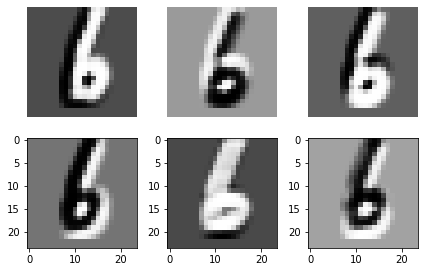

In [78]:
# train data에 대한 결과.
fig,axs = plt.subplots(2,3)

for i in range(2):
  for j in range(3):
    axs[i][j].imshow(trained_out1[0,:,:,(i*3)+j], cmap="gray")
    if i == 0:
      axs[i][j].axis("off")
plt.tight_layout()

In [87]:
trained_weights1 = trained_conv1.get_weights()[0]

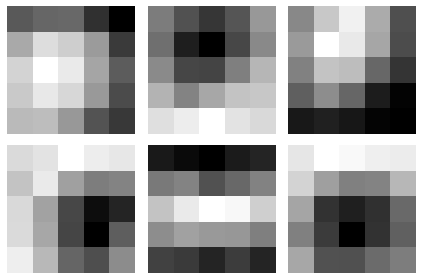

In [88]:
# 필터확인.
fig,axs = plt.subplots(2,3)

for i in range(2):
  for j in range(3):
    axs[i][j].imshow(trained_weights1[:,:,0,(i*3)+j], cmap="gray")
    axs[i][j].axis("off")
plt.tight_layout()

In [89]:
trained_out2 = model.get_layer(index=1)(trained_out1)


In [90]:
trained_out2.shape

TensorShape([1, 12, 12, 6])

In [94]:
def plot_imgs(nrow,ncol,data, cmap = 'gray'):
  fig,axs = plt.subplots(nrow,ncol)
  for i in range(nrow):
    for j in range(ncol):
      axs[i][j].imshow(data[:,:,(i*ncol)+j], cmap=cmap)
      axs[i][j].axis('off')
  plt.tight_layout()

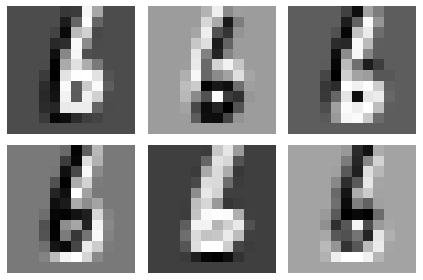

In [93]:
# pooling 결과.
plot_imgs(2,3,trained_out2[0])

In [98]:
model.get_layer(index=2)

In [97]:
trained_out3 = model.get_layer(index=2)(trained_out2)

In [103]:
trained_weights2 = model.get_layer(index=2).get_weights()[0]

In [104]:
trained_weights2.shape

(5, 5, 6, 16)

In [99]:
trained_out3.shape

TensorShape([1, 8, 8, 16])

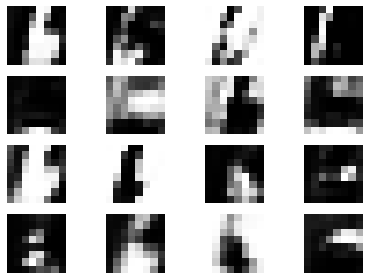

In [100]:
plot_imgs(4,4,trained_out3[0])

In [101]:
trained_out4 = model.get_layer(index=3)(trained_out3)

In [102]:
trained_out4.shape

TensorShape([1, 4, 4, 16])

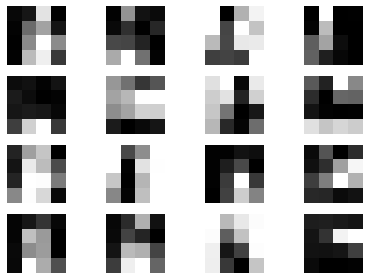

In [105]:
plot_imgs(4,4,trained_out4[0])

In [106]:
image_result = model(image)

In [107]:
image_result

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.5086399e-06, 8.1744212e-05, 6.7484143e-06, 5.2415072e-07,
        6.0936531e-05, 7.2533687e-05, 9.9963796e-01, 7.5728970e-09,
        1.3682990e-04, 2.6675073e-07]], dtype=float32)>

In [108]:
image_result.numpy().ravel() 

array([2.5086399e-06, 8.1744212e-05, 6.7484143e-06, 5.2415072e-07,
       6.0936531e-05, 7.2533687e-05, 9.9963796e-01, 7.5728970e-09,
       1.3682990e-04, 2.6675073e-07], dtype=float32)

(0.0, 1.0)

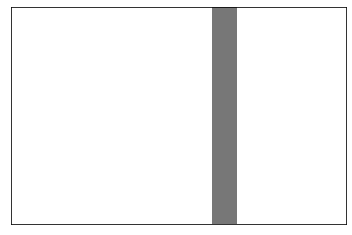

In [109]:
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), image_result.numpy().ravel(),color="#777777")
plt.ylim([0,1])